PRE-LECTURE QUESTIONS

Question 1)

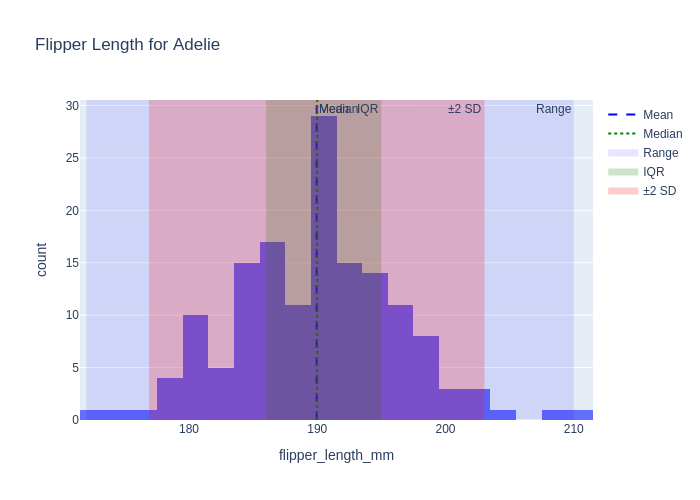

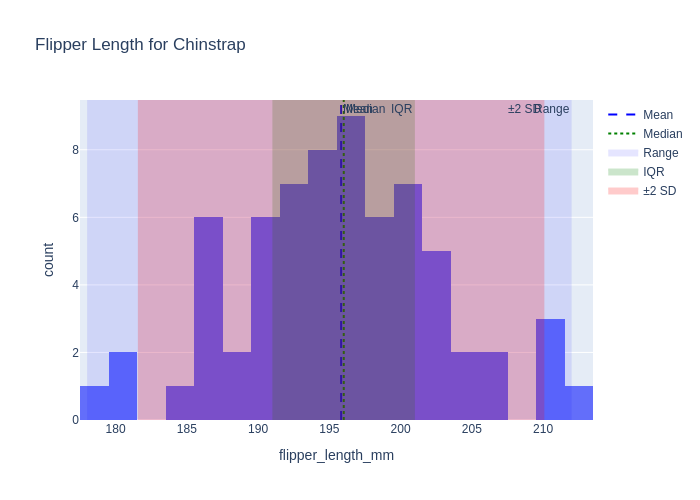

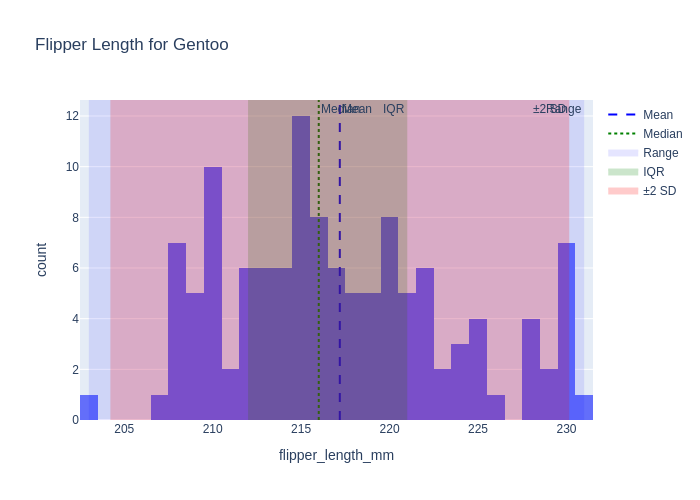

In [4]:
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Load the dataset
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Filter out null values for flipper_length_mm
pingees = pingees.dropna(subset=["flipper_length_mm"])

# Iterate through each species to create a separate plot
for species in pingees['species'].unique():
    # Filter data for each species
    species_data = pingees[pingees['species'] == species]['flipper_length_mm']
    
    # Create the base figure for the histogram
    fig = px.histogram(species_data, x="flipper_length_mm", nbins=30, title=f"Flipper Length for {species}")
    
    # Compute statistics
    mean_val = species_data.mean()
    median_val = species_data.median()
    min_val = species_data.min()
    max_val = species_data.max()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    std_dev = species_data.std()
    
    # Add lines for mean and median
    fig.add_vline(x=mean_val, line_dash="dash", line_color="blue", annotation_text="Mean", annotation_position="top right", name="Mean")
    fig.add_vline(x=median_val, line_dash="dot", line_color="green", annotation_text="Median", annotation_position="top right", name="Median")
    
    # Add rectangle for range (min to max)
    fig.add_vrect(x0=min_val, x1=max_val, line_width=0, fillcolor="blue", opacity=0.1, name="Range", annotation_text="Range")
    
    # Add rectangle for IQR (Q1 to Q3)
    fig.add_vrect(x0=q1, x1=q3, line_width=0, fillcolor="green", opacity=0.2, name="IQR", annotation_text="IQR")
    
    # Add rectangle for ±2 standard deviations from the mean
    fig.add_vrect(x0=mean_val - 2*std_dev, x1=mean_val + 2*std_dev, line_width=0, fillcolor="red", opacity=0.2, name="±2 SD", annotation_text="±2 SD")
    
    # Add a custom legend by adding invisible scatter traces with the correct labels
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', line=dict(color="blue", dash="dash"), showlegend=True, name="Mean"))
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', line=dict(color="green", dash="dot"), showlegend=True, name="Median"))
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', line=dict(color="blue"), fill="toself", fillcolor="blue", opacity=0.1, showlegend=True, name="Range"))
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', line=dict(color="green"), fill="toself", fillcolor="green", opacity=0.2, showlegend=True, name="IQR"))
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', line=dict(color="red"), fill="toself", fillcolor="red", opacity=0.2, showlegend=True, name="±2 SD"))
    
    # Show the figure with the added lines, rectangles, and legend
    fig.show(renderer="png")


Question 2)

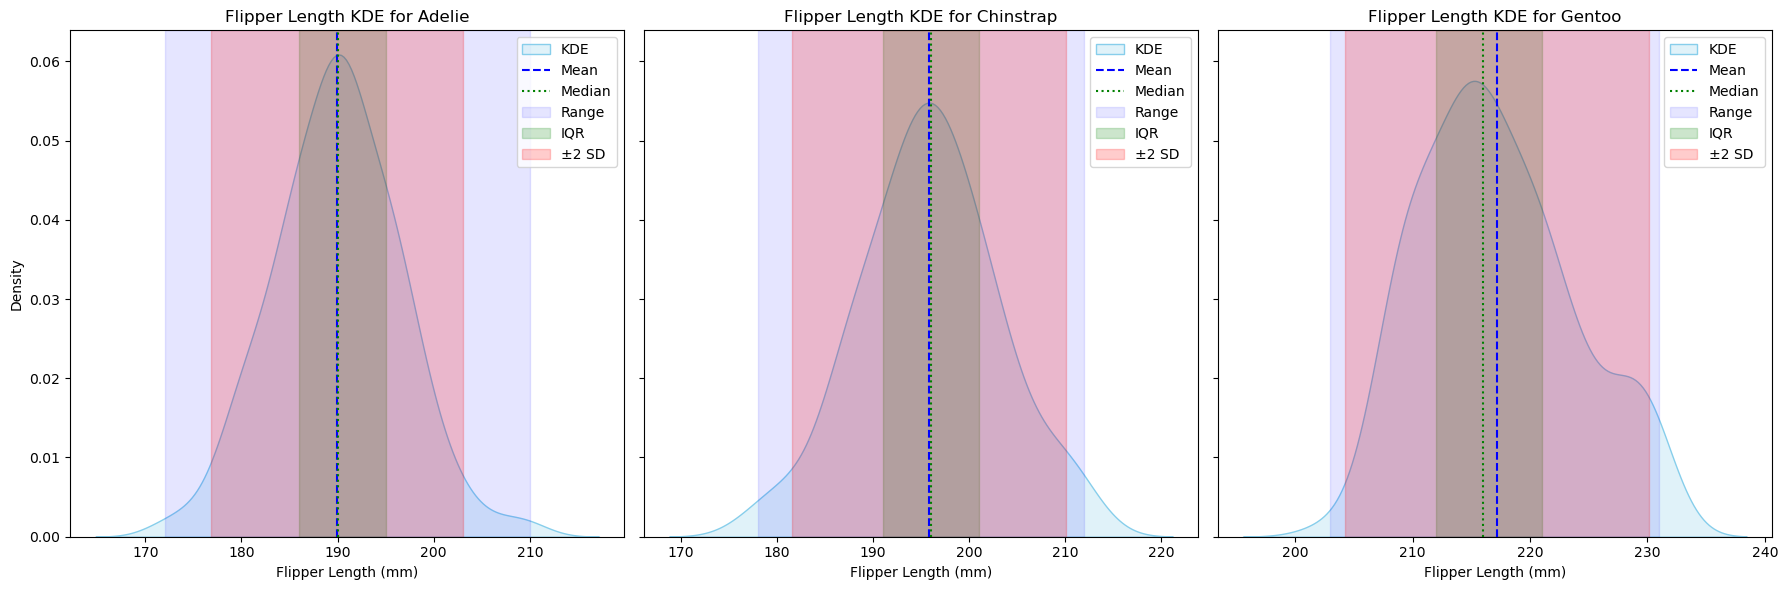

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Filter out null values for flipper_length_mm
pingees = pingees.dropna(subset=["flipper_length_mm"])

# Set up the matplotlib figure with a row of 3 plots (one for each species)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
species_list = pingees['species'].unique()

# Iterate through each species to create a KDE plot
for i, species in enumerate(species_list):
    # Filter data for each species
    species_data = pingees[pingees['species'] == species]['flipper_length_mm']
    
    # Compute statistics
    mean_val = species_data.mean()
    median_val = species_data.median()
    min_val = species_data.min()
    max_val = species_data.max()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    std_dev = species_data.std()
    
    # Plot the KDE for each species
    sns.kdeplot(species_data, ax=axes[i], fill=True, color="skyblue", label="KDE")
    axes[i].set_title(f"Flipper Length KDE for {species}")
    axes[i].set_xlabel("Flipper Length (mm)")
    
    # Add lines for mean and median
    axes[i].axvline(mean_val, color='blue', linestyle='--', label='Mean')
    axes[i].axvline(median_val, color='green', linestyle=':', label='Median')
    
    # Add shaded areas for range (min to max), IQR (Q1 to Q3), and ±2 standard deviations
    axes[i].axvspan(min_val, max_val, color='blue', alpha=0.1, label='Range')
    axes[i].axvspan(q1, q3, color='green', alpha=0.2, label='IQR')
    axes[i].axvspan(mean_val - 2*std_dev, mean_val + 2*std_dev, color='red', alpha=0.2, label='±2 SD')
    
    # Add legends
    axes[i].legend()

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the KDE plots
plt.show()


Question 3)

ChatGPT said my descriptions were "mostly accurate" and then went into a bit more detail about each of the types of data distribution visualization methods.  However, it also corrected a couple errors I made when describing box plots and KDE graphs.  It listed the following pros and cons as well:

Box plots:  Good for comparing multiple data sets, and good because they show important values in the data (median, Q1, Q3, min, max).  However, they do not show details in the data well, and don't always give a good idea of the shape of the data.

Histograms:  Good for showing the shape and distribution of the data, including clusters, gaps, or outliers in the data.  Histograms don't work well if the bin size is not good, as this can change the histogram's appearance and how it is interpreted.

KDE plots:  Good for showing the overall shape of the data, and also easy to understand.  Can be bad, though, if the bandwidth, or smoothing parameter, is not chosen well, which can affect the smoothness of the data (similar to how bin width affects the appearance of a histogram)

My preference: So far, I think I like KDE plots the best, even though this is the first time I've seen them, since I like the way they smooth out the data and show its general shape, which I find more helpful than box plots (which don't show the shape as well).  I also like histograms, but their shape is too easy to change by modifying bin width, and I don't always find them as easy to interpret as the smoothed-out KDE plots.

Question 4)

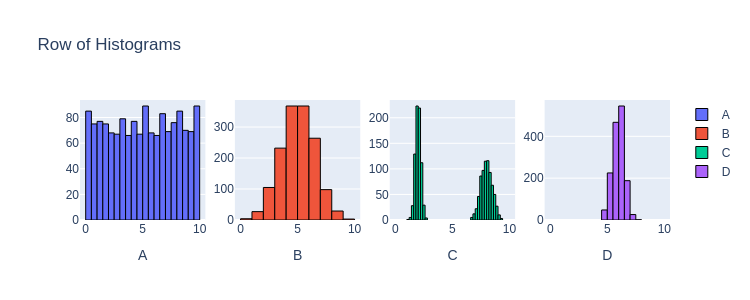

In [7]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Question 4 part 1)

Histograms A, B, and C all appear to have means around 5 (though it's hard to tell for C), while D's is higher, around 7.  However, none of the graphs have very similar variances to each other, as A is more or less uniform, B is a normal distribution / bell curve, C is bimodal, and D is also normal, but with a much smaller range than B.

Question 4 part 2)

Histograms A, B, and C all have similar means (around 5, it looks like), but have very differnt variances (uniform, normal, and binomial distributions, respectively).

Question 4 part 3)

Histograms B and D both have normal distributions, but D's mean appears to be around 7, which is higher than B's mean (5).  However, histogram D also has a smaller range than B (0 to 10 for B vs 4 to 8 for D), so the variances aren't quite the same anyway.

Question 4 part 4)

The means of data sets A, B, and C are all around 5, while only data set D has a higher mean (around 7).  However, all the data sets have very different variances, with A's and C's being high (uniform distribution and binomial distribution with no individual data points near the mean, respectively), and B's and D's variances being lower (normal distributions, with D having a smaller range and therefore lower variance then B).

PRE-LECTURE QUESTION CHATGPT LINKS/SUMMARIES:

Question 1 and 2 (same link: https://chatgpt.com/share/66eefca9-660c-800c-a60a-df9b512eb056):

"In this chat, we discussed how to visualize penguin flipper length data using statistical markers and different plotting libraries. Initially, we worked with Plotly to create histograms for each species, adding lines for the mean and median, and shaded areas for the range, interquartile range (IQR), and ±2 standard deviations. We also added legends for clarity.

Later, we switched to Seaborn, creating kernel density estimation (KDE) plots organized in a row of three plots (one per species), with the same statistical markers added using Matplotlib. Lastly, we confirmed that the area under a KDE curve is always equal to 1, as it represents a probability density function."

Question 3 (https://chatgpt.com/share/66eefccc-6280-800c-a60c-98bdc805c8b3):

"In this chat, you compared box plots, histograms, and KDE plots. I confirmed that your explanation was mostly accurate, with a few minor clarifications:

Box plots show a summary of data (min, max, Q1, median, Q3, outliers) but don't directly indicate data concentration or frequency.
Histograms display data frequency within bins, but don't inherently show statistical measures like mean or median.
KDE plots provide a continuous estimate of the data's distribution, smoothing the data to represent its probability density.
I emphasized that each plot serves different purposes for visualizing data distribution."

POST-LECTURE QUESTIONS

Question 5)

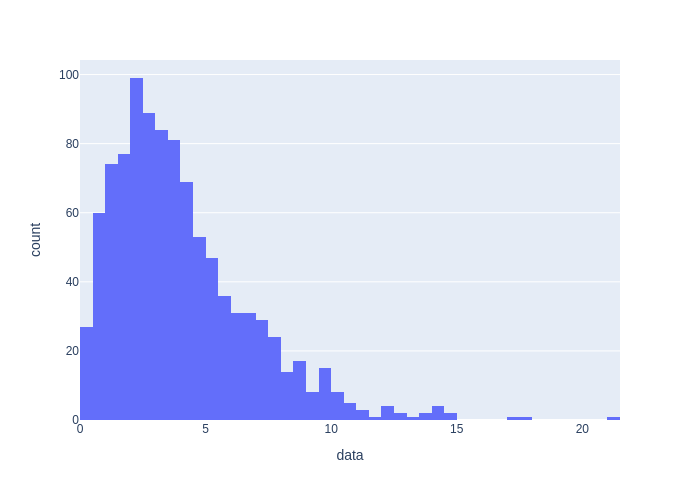

Mean of sample1: 4.031486396679184
Median of sample1: 3.423399550756276


In [5]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px  # Import Plotly Express

# Generate random data from the gamma distribution
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

# Create a histogram using Plotly Express
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")

# Render the plot as a PNG (for submissions on platforms like GitHub or MarkUs)
fig1.show(renderer="png")

# Calculate the mean of the sample
print("Mean of sample1:", sample1.mean())

# Calculate the median (50th percentile) of the sample
print("Median of sample1:", np.quantile(sample1, [0.5])[0])

This is a right-skewed graph, which means that there is a "tail" of data points (including outliers) toward the right of the graph.  Since the mean of the data is calculated by adding the values of all data points and dividing them, these high outliers increase the mean's value, pulling it further to the right than the median, which is not impacted as much by the outliers, since median is not caluclated using the values of individual data points, and instead relies on their positions within the data set.  Thus, the mean is higher than the median in a right-skewed data set like this one (in this case, 4.03 for the mean and 3.42 for the median).

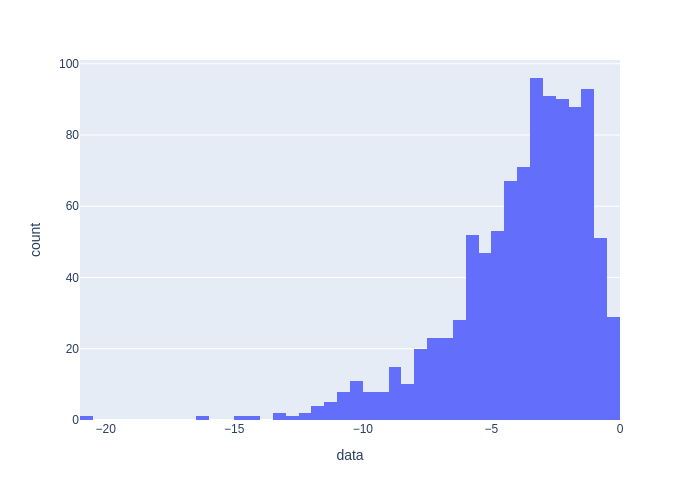

Mean of sample2: -3.8761449229771308
Median of sample2: -3.2949795919097498


In [10]:
# Generate another dataset with negative skew (mirrored gamma distribution)
sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

# Create a histogram using Plotly Express
fig1 = px.histogram(pd.DataFrame({'data': sample2}), x="data")

# Render the plot as a PNG (for submissions on platforms like GitHub or MarkUs)
fig1.show(renderer="png")

# Calculate the mean of the sample
print("Mean of sample2:", sample2.mean())

# Calculate the median (50th percentile) of the sample
print("Median of sample2:", np.quantile(sample2, [0.5])[0])

This is a left-skewed data set, meaning it has a "tail" of values far to the left (negative) of the mean, pulling the mean's value away from the medians and to the left.  The median is not impacted by the tail or outliers in the data as much as the mean, so it is not pulled left.  Thus, in a left-skewed data set, the median will have a higher value than the mean.

Question 6)

In [16]:
df = pd.read_csv("https://raw.githubusercontent.com/hannahramirez/BigfootVsUfos/main/bigfoot_mod.csv")

summary = df.describe()  # General summary of statistics for numeric columns

print("\nSummary:\n", summary)



Summary:
           latitude    longitude         year        month          day  \
count  4045.000000  4045.000000  4045.000000  4045.000000  4045.000000   
mean     39.363271   -97.423304  1998.917429     7.240791    14.344623   
std       5.684022    16.727556    14.628472     3.069564     8.583989   
min      25.141000  -167.131000  1869.000000     1.000000     1.000000   
25%      35.345720  -117.057900  1990.000000     5.000000     8.000000   
50%      39.304500   -91.767330  2003.000000     8.000000    15.000000   
75%      43.931100   -83.069770  2009.000000    10.000000    20.000000   
max      64.891390   -68.228300  2021.000000    12.000000    31.000000   

            decade  norm_population  
count  4045.000000     4.044000e+03  
mean   1994.580964     2.306011e-07  
std      14.966289     2.639638e-07  
min    1860.000000     2.529198e-08  
25%    1990.000000     8.748446e-08  
50%    2000.000000     1.696606e-07  
75%    2000.000000     2.713486e-07  
max    2020.000000

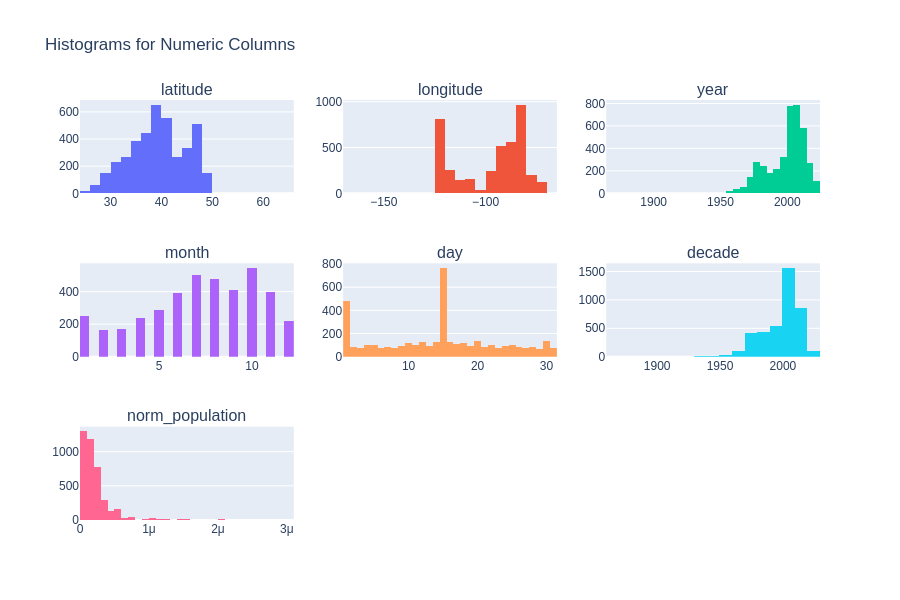

In [35]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/hannahramirez/BigfootVsUfos/main/bigfoot_mod.csv")

# Select only numeric columns
numeric_columns = df.select_dtypes(include='number').columns

# Define the number of columns and rows for the grid layout
n_cols = 3  # Number of histograms per row
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  # Calculate number of rows required

# Create subplots figure
fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=numeric_columns)

# Iterate over each numeric column and add a histogram to the appropriate subplot
for i, col in enumerate(numeric_columns):
    row = i // n_cols + 1
    col_num = i % n_cols + 1
    
    # Add a histogram trace with specified number of bins
    fig.add_trace(
        go.Histogram(x=df[col], nbinsx=31),  # You can change nbinsx to adjust bin size
        row=row, col=col_num
    )

# Update layout for better appearance
fig.update_layout(height=600, width=900, title_text="Histograms for Numeric Columns", showlegend=False)

# Show the final plot
fig.show(renderer="png")


Interesting observations: 

Latitude of bigfoot sightings is bimodal, with peaks at around 40 degrees north (California to Maryland) and 47 degrees north (just north of here), but fewer bigfoot observations in between.

Longitude is also bimodal, with peaks at -120 to -125 degrees (Pacific coast) and -80 to -85 degrees (just west of Toronto)

After combining these two statistics, it seems that bigfoot "hotspot" areas are likely to occur in Northern California, Washington, BC, Ohio, and Ontario around Lake Huron.

Bigfoot sightings were most common in the 2000s, and were much less common in the 1900s and since 2010.

A shockingly high 19% of bigfoot sightings (766 out of 4045) occured on the 15th of the month, while another 12% occured on the 1st day of the month.  This suggests that many people fabricated their bigfoot sightings with a made-up date, as these dates would likely be the first to come to mind, and they are both 4-6 times more common than they would be expected to be, and far more common than any other days.

Question 7)

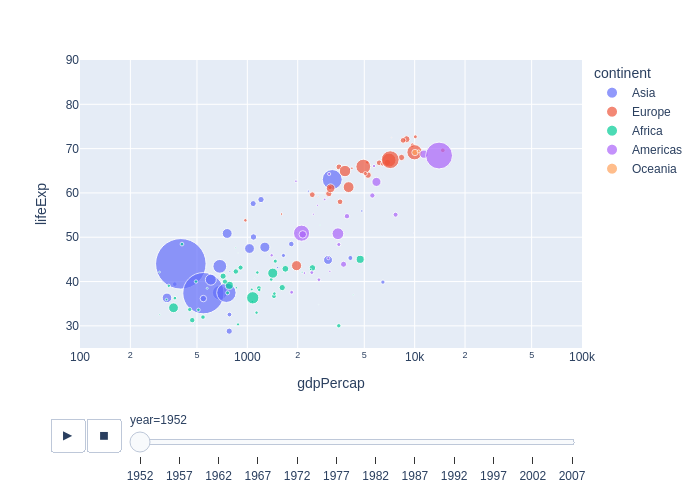

In [53]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
fig.show(renderer="png")

Question 8)

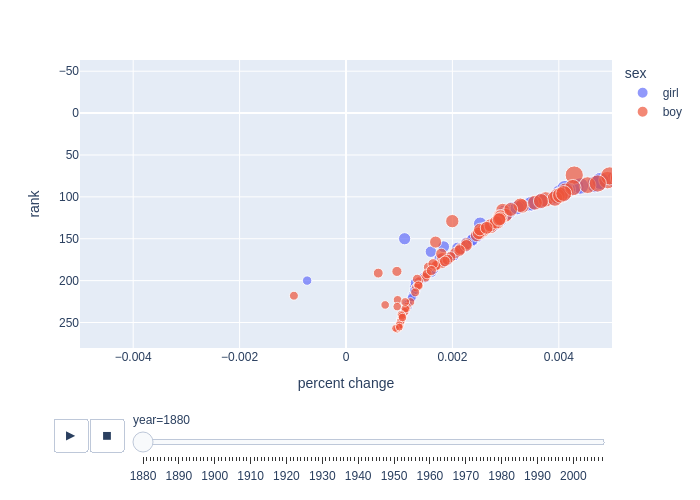

In [41]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png")

Question 9)

Somewhat

POST-LECTURE QUESTION CHATGPT LINKS/SUMMARIES: 

Question 5: https://chatgpt.com/share/66f1c9fd-d46c-800c-b5b0-41532d3e666b

"In this chat, we covered several topics related to statistical measures and a Python script. Here's a summary:

Mean, Median, and Skewness:

Mean: The average of all data points, sensitive to outliers.
Median: The middle value of sorted data, resistant to outliers.
Skewness:
Symmetric Distribution: Mean ≈ Median.
Right-Skewed: Mean > Median.
Left-Skewed: Mean < Median.
Python Code Explanation:

Imports: scipy.stats for statistical functions, pandas for DataFrame handling, numpy for numerical calculations.
Generate Data: Creates a dataset sample1 from a gamma distribution.
Histogram: Plots the histogram of sample1 using Plotly Express (px).
Mean and Median: Calculates the mean and median of sample1.
Negative Skew: Creates a negatively skewed dataset sample2 by negating values from the gamma distribution.
Issue and Solution:

Error: NameError: name 'px' is not defined due to missing Plotly Express import.
Solution: Added import plotly.express as px to fix the issue.
The updated code now correctly generates and visualizes the data, calculates statistical measures, and handles skewness."

Question 6: https://chatgpt.com/share/66f1ca6e-ed5c-800c-871e-2aaeb23b0704

"Here’s a summary of our chat:

Statistics Calculation:

You learned how to compute mean, median, standard deviation, and other statistics for a dataset using Pandas.
Histograms with Plotly:

You created histograms for each numeric column in a dataset using Plotly, and you learned how to arrange them in a grid format.
Bar Graphs for Categorical Data:

You needed to replace histograms for categorical data (specifically "month" and "decade") with bar graphs.
You updated your approach to use go.Bar for categorical columns and replaced the histograms with appropriate bar graphs while ensuring all histograms and bar graphs fit in a grid layout.
Final Adjustment:

You adjusted the code to ensure the layout correctly replaced histograms for the specified categorical columns with bar graphs while maintaining a clear and organized grid display."

Questions 7-9: No ChatGPT used